In [10]:
import os
import sys

import pandas as pd
import numpy as np
from scripts.csvtopaquet import csv_to_parquet_single_file

current_directory = os.getcwd()
csv1_file_path = os.path.join(current_directory, '01-data', 'ex_fraud.csv')
csv2_file_path = os.path.join(current_directory, '01-data', 'ex_fraud2.csv')
csv3_file_path = os.path.join(current_directory, '01-data', 'ex1_Base.csv')
csv4_file_path = os.path.join(current_directory, '01-data', 'FD_creditcard_data.csv')

output_file_path1 = os.path.join(current_directory, '01-data', 'ex_fraud.parquet')
output_file_path2 = os.path.join(current_directory, '01-data', 'ex_fraud2.parquet')
output_file_path3 = os.path.join(current_directory, '01-data', 'ex1_Base.parquet')
output_file_path4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')

csv_to_parquet_single_file(csv_file_path=csv1_file_path, output_file_path=output_file_path1, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv2_file_path, output_file_path=output_file_path2, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv3_file_path, output_file_path=output_file_path3, chunksize=100000, sample_rows=None, drop_columns=None)
csv_to_parquet_single_file(csv_file_path=csv4_file_path, output_file_path=output_file_path4, chunksize=100000, sample_rows=None, drop_columns=None)

Row count before sampling: 5008
Row count after sampling: 5008
Conversion completed. The data has been saved to '/Users/danramirez/mbs-fraud-detection/01-data/ex_fraud.parquet'.


/Users/danramirez/mbs-fraud-detection/scripts/csvtopaquet.py:9: DtypeWarning: Columns (2,3,4,5,11,12,13,14,15,28,32,40,86,87,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_file_path, chunksize=chunksize):


Row count before sampling: 296483
Row count after sampling: 296483
Conversion completed. The data has been saved to '/Users/danramirez/mbs-fraud-detection/01-data/ex_fraud2.parquet'.
Row count before sampling: 1000000
Row count after sampling: 1000000
Conversion completed. The data has been saved to '/Users/danramirez/mbs-fraud-detection/01-data/ex1_Base.parquet'.
Row count before sampling: 5050
Row count after sampling: 5050
Conversion completed. The data has been saved to '/Users/danramirez/mbs-fraud-detection/01-data/FD_creditcard_data.parquet'.


In [11]:
current_directory = os.getcwd()
parquetFile1 = os.path.join(current_directory, '01-data', 'ex_fraud.parquet')
parquetFile2 = os.path.join(current_directory, '01-data', 'ex_fraud2.parquet')
parquetFile3 = os.path.join(current_directory, '01-data', 'ex1_Base.parquet')
parquetFile4 = os.path.join(current_directory, '01-data', 'FD_creditcard_data.parquet')


df1 = pd.read_parquet(parquetFile1)
df2 = pd.read_parquet(parquetFile2)
df3 = pd.read_parquet(parquetFile3)
df4 = pd.read_parquet(parquetFile4)


print('df1:', df1.dtypes)
print('')
print('df2:',df2.dtypes)
print('')
print('df3:',df3.dtypes)
print('')
print('df4:',df4.dtypes)


df1: fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards            

# Logistic Regression

In [12]:
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import openpyxl
import pandas as pd
import statsmodels.api as sm
import numpy as np  # Importing numpy
from sklearn.model_selection import train_test_split

# Assuming your DataFrame and target variable setup
X = df4.drop(['Class','id'], axis=1)
Y = df4['Class']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.Logit(Y, X).fit()

# Get model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.006375
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 5050
Model:                          Logit   Df Residuals:                     5020
Method:                           MLE   Df Model:                           29
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                  0.8852
Time:                        12:30:01   Log-Likelihood:                -32.196
converged:                       True   LL-Null:                       -280.51
Covariance Type:            nonrobust   LLR p-value:                 1.421e-86
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.4734      2.538     -4.127      0.000     -15.448      -5.499
age              -0

# Descision Tree

Model Accuracy: 99.80%


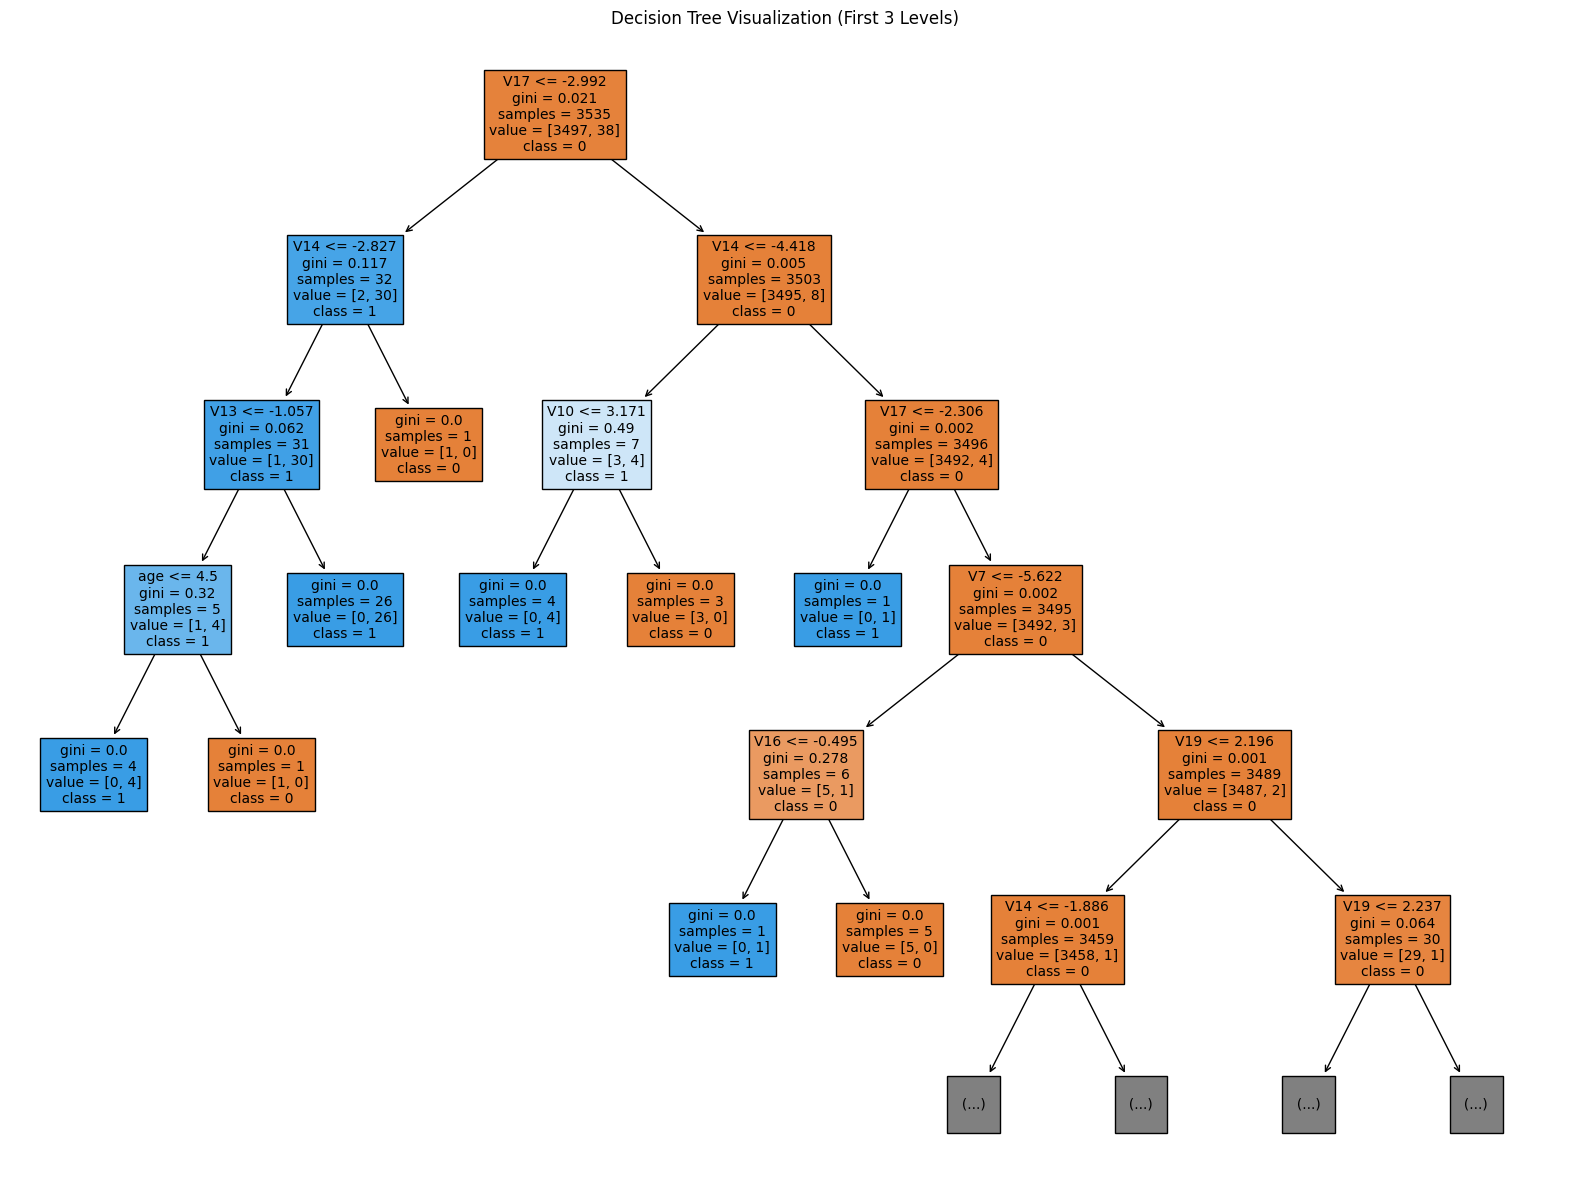

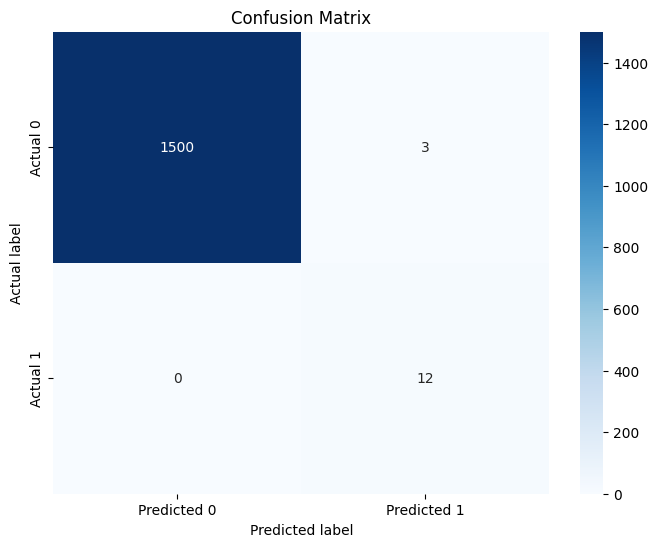

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1503
           1       0.80      1.00      0.89        12

    accuracy                           1.00      1515
   macro avg       0.90      1.00      0.94      1515
weighted avg       1.00      1.00      1.00      1515

               Importance
V17              0.764342
V14              0.111168
V10              0.045603
V19              0.026579
V16              0.022168
age              0.021281
V13              0.004462
V7               0.004396
V24              0.000000
V25              0.000000
V26              0.000000
V22              0.000000
V21              0.000000
V27              0.000000
V20              0.000000
V28              0.000000
V23              0.000000
V15              0.000000
V18              0.000000
maritalstatus    0.000000
V12              0.000000
V11              0.000000
V9               0.000000
V8               0.000000
familysize       0.0000

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

# Assuming your DataFrame and target variable setup
X = df4.drop(['Class','id'], axis=1)
Y = df4['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Training a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = dt_model.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy1 * 100:.2f}%")

# Functions for calculating and estimating entropy are assumed to be correctly implemented as per your initial snippet
# average_entropy_at_depths = estimate_entropy_at_depths(dt_model, X_train, y_train)
# for depth, entropy in average_entropy_at_depths.items():
#     print(f"Depth {depth}: Average Entropy = {entropy:.4f}")

# Decision Tree visualization (truncated to the first 3 levels for simplicity)
plt.figure(figsize=(20,15))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['0', '1'], max_depth=5, fontsize=10)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

# Displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Printing the classification report
report = classification_report(y_test, y_pred)
print(report)

# Displaying feature importances
feature_importances = pd.DataFrame(dt_model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
print(feature_importances)



# Random Forest

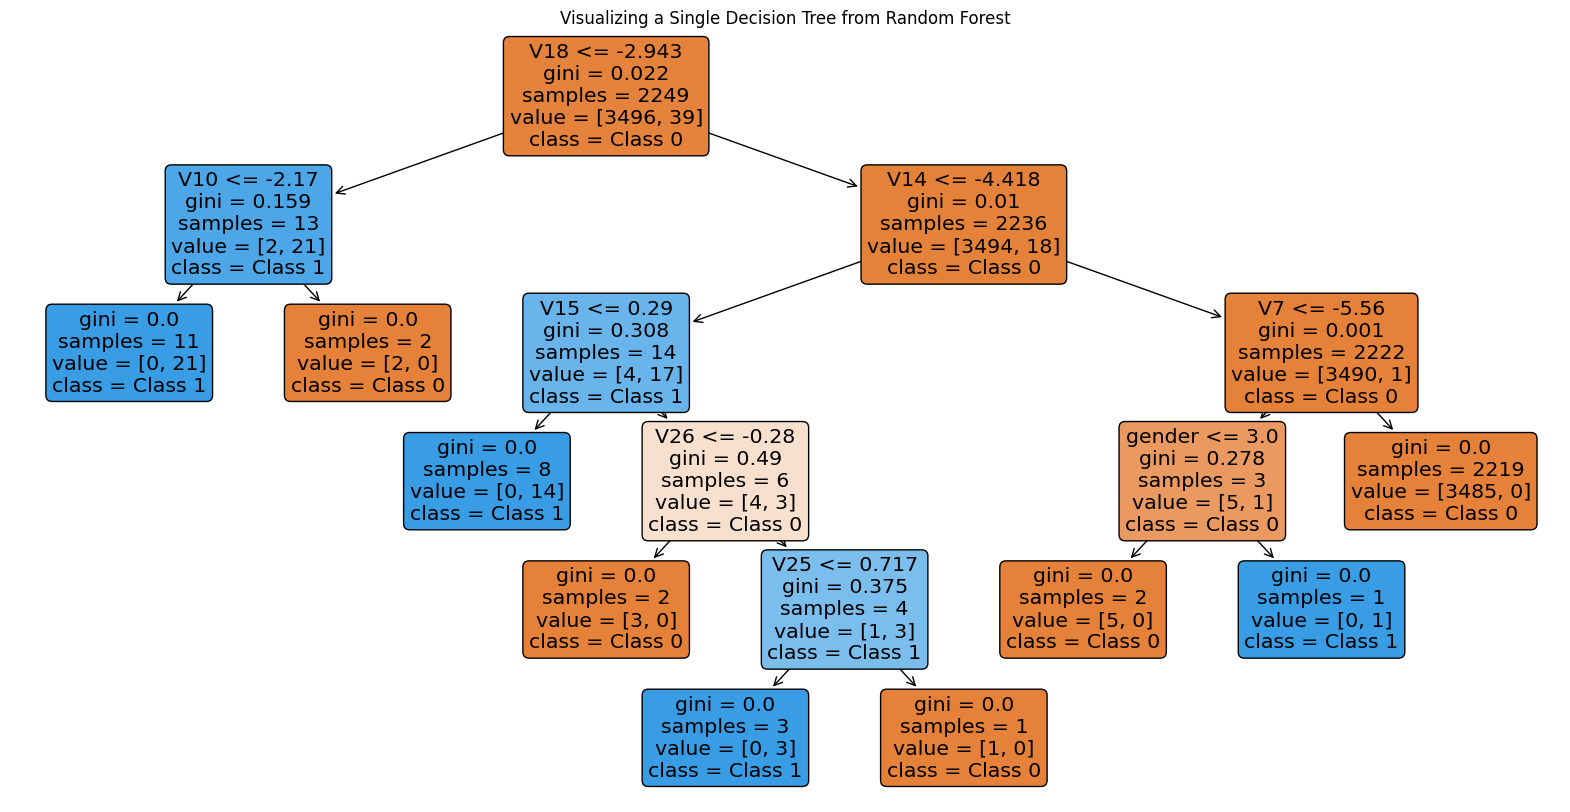

Model Accuracy: 99.93%


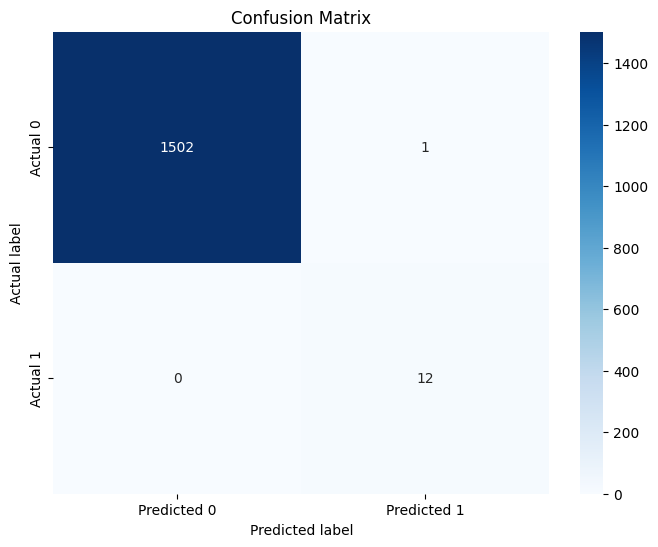

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1503
           1       0.92      1.00      0.96        12

    accuracy                           1.00      1515
   macro avg       0.96      1.00      0.98      1515
weighted avg       1.00      1.00      1.00      1515

               Importance
V10              0.162459
V17              0.143772
V14              0.133950
V12              0.117668
V16              0.104929
V11              0.095723
V7               0.049305
V18              0.037737
V9               0.027819
V21              0.013463
V8               0.012685
V13              0.011619
V19              0.011536
V23              0.009753
V20              0.007670
V27              0.007632
V22              0.006434
V15              0.005728
Amount           0.005613
V26              0.005053
V28              0.004909
gender           0.004355
V25              0.004310
housepayment     0.003712
familyincome     0.0034

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Changed from DecisionTreeClassifier to RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators and other parameters as needed
rf_model.fit(X_train, y_train)

single_tree = rf_model.estimators_[0]

plt.figure(figsize=(20,10))
# Plot the single decision tree
plot_tree(single_tree, 
          feature_names=X.columns, 
          class_names=['Class 0', 'Class 1'],  # Adjust class names as necessary
          filled=True, 
          rounded=True, 
          max_depth=10)  # Limiting tree depth for easier visualization; adjust as needed

plt.title("Visualizing a Single Decision Tree from Random Forest")
plt.show()

y_pred = rf_model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy2 * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# Feature Importances
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
print(feature_importances)


# KNN

Model Accuracy: 99.67%


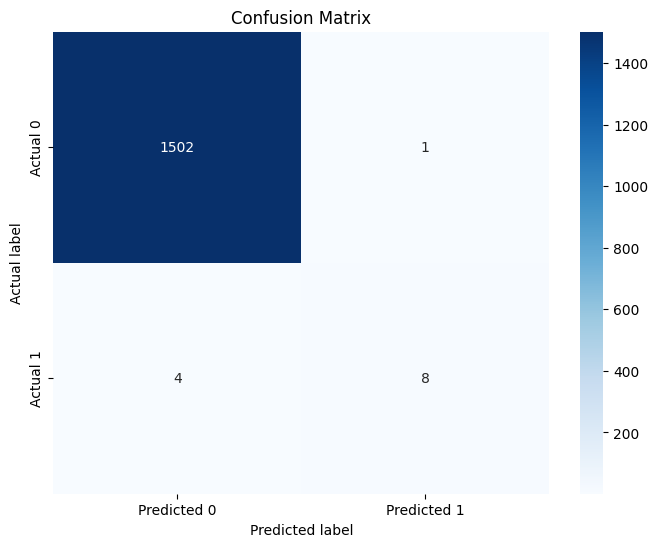

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1503
           1       0.89      0.67      0.76        12

    accuracy                           1.00      1515
   macro avg       0.94      0.83      0.88      1515
weighted avg       1.00      1.00      1.00      1515



In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and Y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is a key parameter
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)

# Model Accuracy
accuracy3 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy3 * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)


# Gaussian 

Model Accuracy: 98.28%


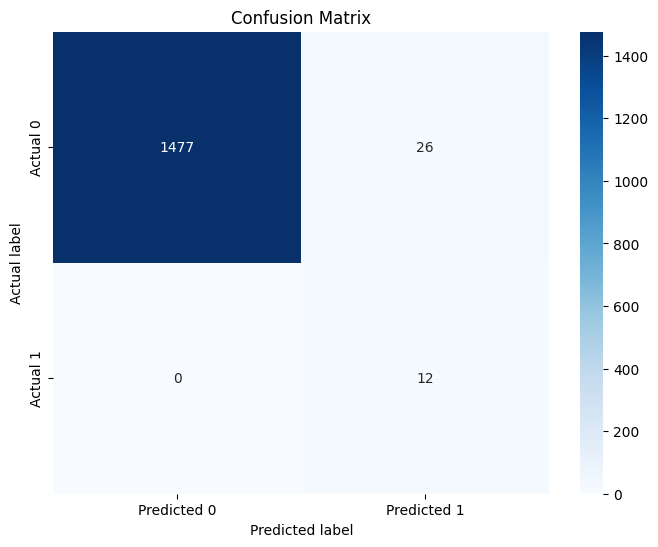

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1503
           1       0.32      1.00      0.48        12

    accuracy                           0.98      1515
   macro avg       0.66      0.99      0.74      1515
weighted avg       0.99      0.98      0.99      1515



In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and Y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize and train the Gaussian Naive Bayes Classifier
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predictions
y_pred = gnb_model.predict(X_test)

# Model Accuracy
accuracy4 = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy4 * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print(report)


In [18]:
print(f"Model Accuracy(Descision Tree): {accuracy1 * 100:.2f}%")
print(f"Model Accuracy(Random Forest): {accuracy2 * 100:.2f}%")
print(f"Model Accuracy(KNN): {accuracy3 * 100:.2f}%")
print(f"Model Accuracy(Gaussian): {accuracy4 * 100:.2f}%")


Model Accuracy(Descision Tree): 99.80%
Model Accuracy(Random Forest): 99.93%
Model Accuracy(KNN): 99.67%
Model Accuracy(Gaussian): 98.28%
